In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the data into a dataframe
df = pd.read_csv('Data_for_UCI_named.csv')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


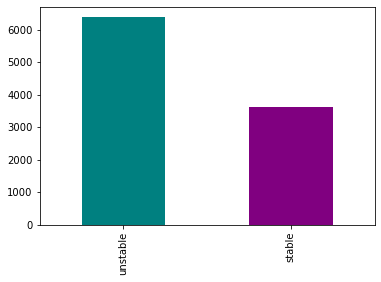

In [5]:
df.stabf.value_counts().plot.bar(color = ['teal', 'purple']);

In [6]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
le = LabelEncoder()

# Assigning numerical values and storing in another column
df['stabf'] = le.fit_transform(df['stabf'])
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,1


In [7]:
# Because of the direct relationship between 'stab' and 'stabf','stab' is dropped 
df.drop('stab', axis = 1, inplace = True)

In [8]:
# import train split library
from sklearn.model_selection import train_test_split

x = df.drop(['stabf'], axis = 1)
y = df['stabf']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 1)

In [9]:
from sklearn.preprocessing import StandardScaler

# apply standardscaler to normalize dataset
sc_x = StandardScaler()
sc_y = StandardScaler()

x_train = sc_x.fit_transform(x_train)
x_test = x_test.reset_index(drop=True)
x_test = sc_x.transform(x_test)

In [10]:
# transform the array to a dataframe
x_train = pd.DataFrame(x_train, columns = x.columns)
x_test = pd.DataFrame(x_test, columns = x.columns)

In [11]:
# check the statistical summary of the normalised dataset
x_train.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
count,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03
mean,-1.296185e-17,-5.152823e-17,4.745510e-17,-2.364497e-16,-4.278522e-16,-3.066158e-16,3.082395e-16,-1.026124e-16,-8.940071e-17,-2.159106e-16,4.111989e-16,-9.825474e-18
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00
min,-1.729968e+00,-1.730603e+00,-1.737156e+00,-1.736849e+00,-2.859769e+00,-1.729344e+00,-1.728149e+00,-1.726799e+00,-1.725913e+00,-1.730382e+00,-1.735079e+00,-1.732426e+00
25%,-8.612112e-01,-8.659929e-01,-8.684020e-01,-8.612716e-01,-7.001897e-01,-8.701777e-01,-8.688208e-01,-8.617516e-01,-8.704214e-01,-8.687498e-01,-8.631636e-01,-8.664736e-01
50%,2.761445e-03,-4.703122e-03,1.932288e-03,-3.758029e-03,-2.591963e-03,-4.486177e-03,5.848845e-04,-7.230831e-03,-5.757044e-03,1.094796e-04,3.622378e-03,4.780989e-04
75%,8.620374e-01,8.608394e-01,8.667755e-01,8.632527e-01,7.129406e-01,8.739349e-01,8.692821e-01,8.681892e-01,8.643825e-01,8.641738e-01,8.655752e-01,8.636007e-01
max,1.731513e+00,1.734126e+00,1.739130e+00,1.738674e+00,2.787505e+00,1.736651e+00,1.727345e+00,1.724887e+00,1.732812e+00,1.729643e+00,1.731885e+00,1.731522e+00


In [12]:
# pip install lightgbm

#### Use scikit learn to train a random forest and extra trees classifier. And use xgboost and lightgbm to train an extreme boosting model and a light gradient boosting model. Use random_state = 1 for training all models and evaluate on the test set

In [13]:
# import classifier models and extreme boosting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [14]:
# feed the models to fit into  dictionary
models = {'Random Forest': RandomForestClassifier(random_state = 1),
          'Extra Trees': ExtraTreesClassifier(random_state = 1),
          'XGBoost': XGBClassifier(random_state = 1),
          'LGBoost': LGBMClassifier(random_state = 1)
         }

In [15]:
# create a function to fit and score models

def fit_score(models, X_train, X_test, Y_train, Y_test):
    '''
    function to fit and score machine learning models
    parameters
    ---------------------------------------------
    models: dictionary of all scikit learn machine leraning models to fit and evaluate
    X_train: training set of the predictors to fit into model
    X_test: test set of the predictors to fit into model
    Y_train: training set of the depedent varaiable
    Y_test: test set of dependent variable
    '''
#     define a random seed to make same set of prediction appear each time program is run(for reproducability)
    np.random.seed(0)
#     define a dictionary for the model scores
    model_scores = {}

#     iterate through the models dictionary items
    for name, model in models.items():
#         fit model the training set into each model in the dictionary
        model.fit(X_train, Y_train)
#     get the model score and attach it to each of the model name from model dictionary 
        model_scores[name] = model.score(X_test, Y_test)
    return model_scores

In [16]:
# Display the evaluation score of the models
accuracy = fit_score(models = models,
                  X_train = x_train,
                  Y_train = y_train,
                  X_test = x_test,
                  Y_test = y_test)
accuracy

{'Random Forest': 0.929,
 'Extra Trees': 0.928,
 'XGBoost': 0.9455,
 'LGBoost': 0.9395}

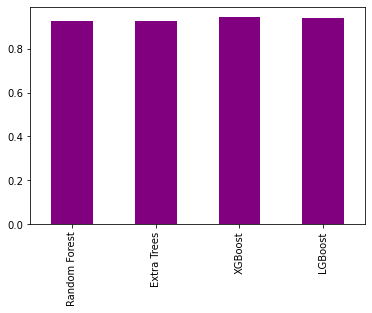

In [17]:
# display scores as a dataframe for proper comparison
accuracy= pd.DataFrame(accuracy, index=['Accuracy'])
accuracy.T.plot.bar(color = 'purple', legend = False);

In [18]:
XGBClassifier(random_state = 1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [19]:
# predict the dataset with the model with the highest accuracy
xmodel = XGBClassifier(random_state = 1)
xmodel.fit(x_train, y_train)
ypred = xmodel.predict(x_test)
ypred

array([1, 1, 0, ..., 0, 1, 1])

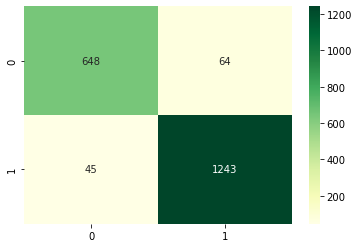

In [20]:
# import evaluation metrics module
from sklearn.metrics import classification_report, confusion_matrix
# plot the confusion matrix
sns.heatmap((confusion_matrix(y_test,ypred)),annot=True,fmt='.5g',cmap="YlGn");

In [21]:
# Creating the hyperparameter grid
param_grid = {'n_estimators': np.arange(10, 1000, 50),
              'max_features': ['auto','sqrt','log2'],
              'min_samples_split': np.arange(2, 20, 2),
              'min_samples_leaf': np.arange(1, 20, 2),
              }

# param_grid = {
#     'n_estimators': [10,50,100],
#     'criterion': ['mse', 'mae'],
#     'max_depth': [2,8,16,32,50],
#     'min_sample_split': [2,4,6],
#     'min_sample_leaf': [1,2],
#     #'oob_score': [True, False],
#     'max_features': ['auto','sqrt','log2'],    
#     'bootstrap': [True, False],
    # 'warm_start': [True, False],
# }

##### HYPERPARAMETER TUNING

In [22]:
# import hyperparameter tuning module
from sklearn.model_selection import RandomizedSearchCV

# Instantiating Random Forest classifier
extr = ExtraTreesClassifier(random_state = 1)

# Instantiating RandomizedSearchCV object
extr_cv = RandomizedSearchCV(extr, param_grid, cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1, random_state = 1)

extr_cv.fit(x_train, y_train)

# Print the tuned parameters and score
extr_cv.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 760,
 'min_samples_split': 6,
 'min_samples_leaf': 3,
 'max_features': 'auto'}

In [23]:
extr_cv.fit(x_train, y_train)
extr_cv.score(x_test, y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


0.926

Train a new ExtraTreesClassifier Model with the new Hyperparameters from the RandomizedSearchCV (with random_state = 1). Is the accuracy of the new optimal model higher or lower than the initial ExtraTreesClassifier model with no hyperparameter tuning?

In [24]:
# Instantiating Extra Tree classifier
trees = ExtraTreesClassifier(n_estimators = 760, min_samples_split = 6, 
                             min_samples_leaf = 3, max_features = 'auto', random_state = 1)

trees.fit(x_train, y_train)
trees.score(x_test, y_test)

0.926

In [25]:
a = extr_cv.best_estimator_.feature_importances_

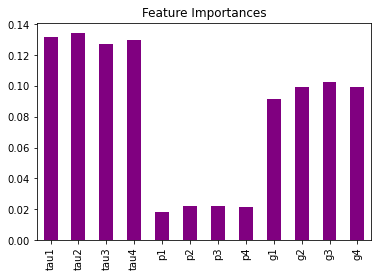

In [32]:
feat_imp = pd.DataFrame(a, index = df.drop(['stabf'], axis = 1).columns)
# visualize the feature importance
feat_imp.plot.bar(title ='Feature Importances', color = 'purple', legend = False);
